<br><br>
<font size = '6'><b>Discrete Signals</b></font>

<table style="border-style: hidden; border-collapse: collapse;" width = "90%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 60% style="border-style: hidden; border-collapse: collapse;">
             
        </td>
        <td width = 30%>
        Prof. Seungchul Lee<br>
        iSystems<br>
        UNIST<br>
        http://isystems.unist.ac.kr/
        </td>
    </tr>
</table>

Table of Contents
<div id="toc"></div>

# 0. Introduction

Signal processing studies _signals_ and _systems_

Signal: 
- A detectable physical quantity... by which messages or information can be transmitted
- Signal carreis information

systems: 
- Manipulate the information carried by signals

Goals:
- Develop intuition and learn how to reason analytically about signal processing problems

Prerequisites that you have a solid understanding of 
- Complex numbers and arithmetic
- Linear algebra (vector, matrix, dot products, eigenvectors, basis, ...)
- Matlab or python

# 1. Discrete Time Signals

A __signal__ $x[n]$ is a function that maps an independent variable to a dependent variable.

In this course, we will focus on discrete-time signals $x[n]$:
- Independent variable is an integer: $n \in \mathbb{Z}$
- Dependent variable is a real or complex number: $x[n] \in \mathbb{R} \;\text{or}\; \mathbb{C}$


## 1.1. Plot real signals

- `plot` for continuous signals in Matlab

- `stem` for discrete signals in Matlab

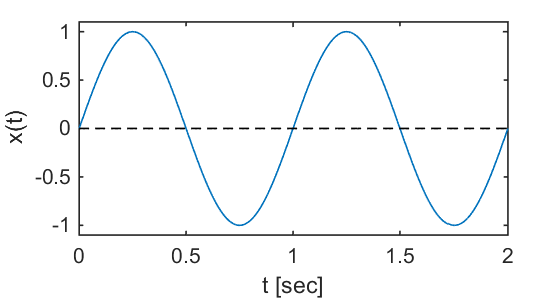

In [1]:
%plot -s 560,300

t = [0:0.01:2];
x = sin(2*pi*t);

plot(t,x,t,zeros(size(t)),'k--'), ylim([-1.1 1.1])
xlabel('t [sec]'); 
ylabel('x(t)');

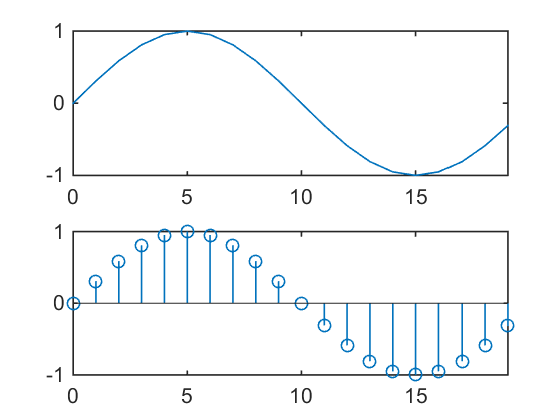

In [1]:
%plot -s 560,420

N = 20;
n = 0:N-1;
x = sin(2*pi/N*n);

subplot(2,1,1);  plot(n,x), axis tight
subplot(2,1,2);  stem(n,x), axis tight

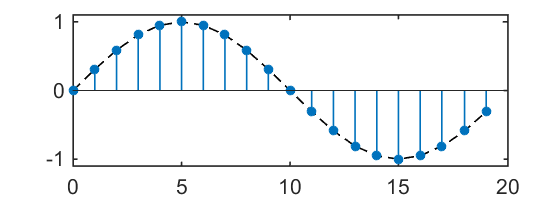

In [3]:
%plot -s 560,200

plot(n,x,'k--'), hold on
stem(n,x,'filled','markersize',4), hold off
ylim([-1.1 1.1])

## 1.2. Plot Complex Signals

A complex signal $x[n] \in \mathbb{C}$ can be equivalently represented in two ways
- rectangular form
$$ x[n]= \text{Re}\{x[n]\} + j\,\text{Im}\{x[n]\}$$

- polar form
$$x[n] = \lvert x[n] \rvert \, e^{j \angle x[n]}$$



For example,

$$x[n]=e^{-\frac{n}{N}}e^{j\frac{2\pi}{N} n}$$

In [4]:
%% real and imag parts
N = 20;
n = 0:2*N-1;
x = exp(-n/N).*exp(1j*2*pi/N*n);

__1) retangular form__

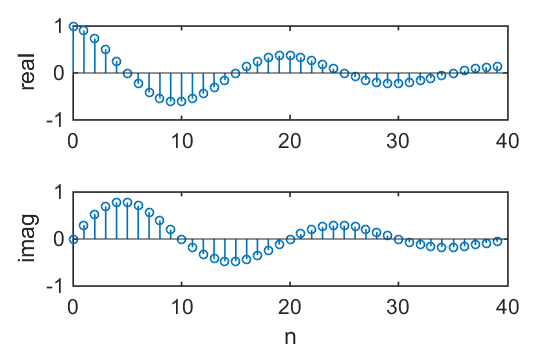

In [5]:
%plot -s 560,350

subplot(2,1,1);     stem(n,real(x),'markersize',4), ylabel('real')
subplot(2,1,2);     stem(n,imag(x),'markersize',4), ylabel('imag'), xlabel('n')

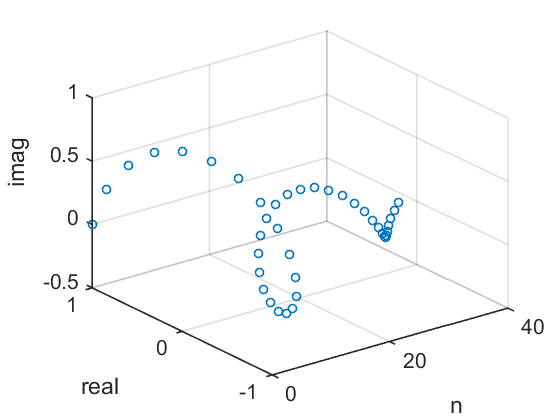

In [6]:
%plot -s 560,420
plot3(n,real(x),imag(x),'o','markersize',4)
xlabel('n'), ylabel('real'), zlabel('imag')
grid on

__2) polar form__

$$x[n] = \lvert x[n]\lvert \, e^{j\angle x[n]} \;\in\; \mathbb{C}$$

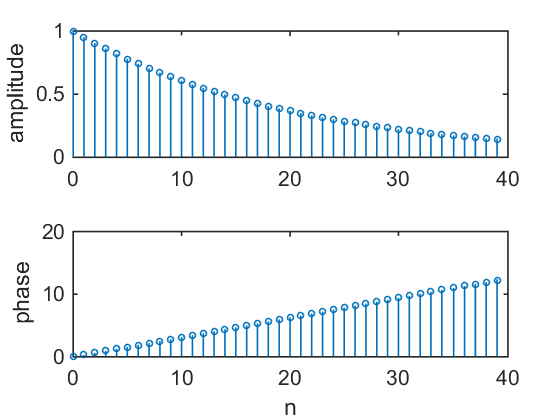

In [7]:
%plot -s 560,420
%% magnitude and phase
subplot(2,1,1);     stem(n,abs(x),'markersize',3), ylabel('amplitude')
subplot(2,1,2);     stem(n,(phase(x)),'markersize',3), ylabel('phase'), xlabel('n')

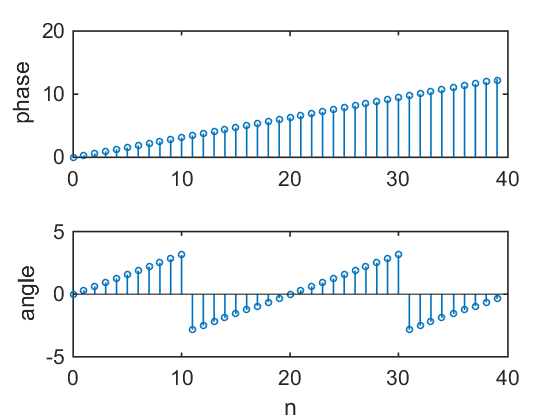

In [8]:
% see the difference between 'phase' and 'angle'
subplot(2,1,1);     stem(n,phase(x),'markersize',3), ylabel('phase')
subplot(2,1,2);     stem(n,angle(x),'markersize',3), ylabel('angle'), xlabel('n')

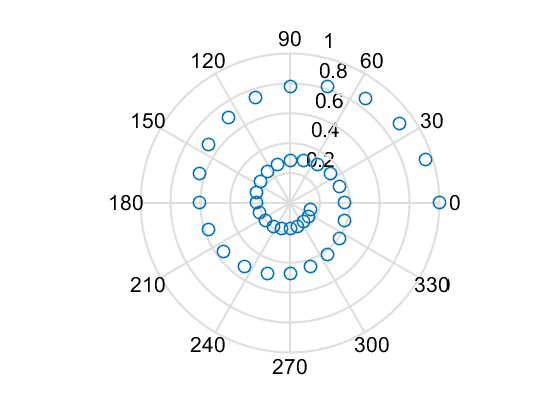

In [9]:
%% polar coordinate
polar(angle(x),abs(x),'o')      % theta in radian

# 2. Signal Properties

## 2.1 Periodic Signals

$$
x[n+mN]=x[n] \quad \forall m \in \mathbb{Z}$$

<br>
<img src = "./image_files/periodic.png" style="border:1px solid black" width = 700>


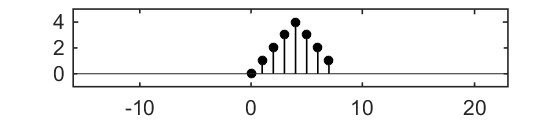

In [10]:
%plot -s 560,120
N = 8;
n = 0:N-1;
x = [0 1 2 3 4 3 2 1];

stem(n,x,'k','filled','markersize',4);
xlim([-16,23]), ylim([-1,5])

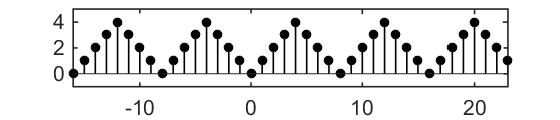

In [11]:
%plot -s 560,120

%% periodic using mod
y = [];
n = -16:23;

for i = 1:length(n)
    y(i) = x(mod(n(i),N)+1);
end

stem(n,y,'k','filled','markersize',4), axis tight
ylim([-1,5])

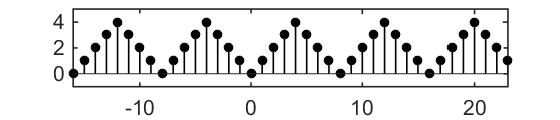

In [12]:
%plot -s 560,120

%% 'repmat' command
xp = repmat(x,1,5);
stem(n,xp,'k','filled','markersize',4), axis tight
ylim([-1 5])

__Shifting Periodic Signals__

<img src = "./image_files/circular.png" style="border:1px solid black" width = 700>

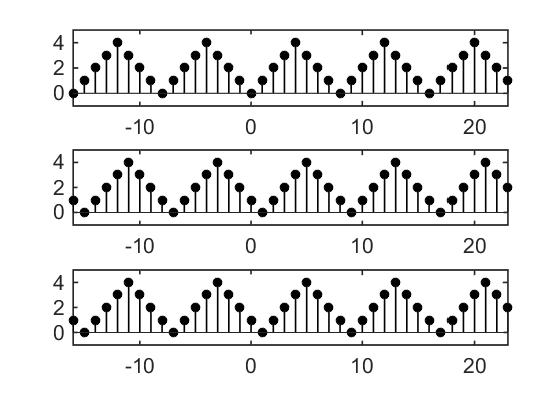

In [13]:
%plot -s 560,400
%% circular shift

n = 0:N-1;
x = [0 1 2 3 4 3 2 1];
xs = circshift(x',1)';

ys = [];
n = -16:23;

for i = 1:length(n)
    ys(i) = xs(mod(n(i),N)+1);
end

subplot(3,1,1), stem(n,repmat(x,1,5),'k','filled','markersize',4), axis tight, ylim([-1 5])
subplot(3,1,2), stem(n,repmat(xs,1,5),'k','filled','markersize',4), axis tight, ylim([-1 5])
subplot(3,1,3), stem(n,ys,'k','filled','markersize',4), axis tight, ylim([-1 5])

Check the python program to visualize circular (periodic finite-length signals)

https://github.com/unpingco/Python-for-Signal-Processing/blob/master/Fourier_Transform.ipynb

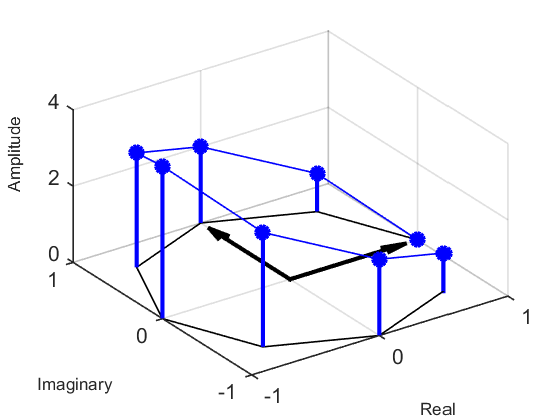

In [14]:
%plot -s 560,420
% periodic discrete-time signal - circular representation

N = 8;
theta2 = (0:1/N:1)*2*pi;
theta = theta2(1:end-1);

x = cos(theta);
y = sin(theta);
z = [0 1 2 3 4 3 2 1];

figure(1),  clf
stem3(x,y,z,'filled','b','linewidth',2);   
hold on;
plot3(x,y,z,'b')
plot(x,y,'k')
quiver(0,0,1,0,'k','linewidth',2,'maxheadsize',0.5)
quiver(0,0,0,1,'k','linewidth',2,'maxheadsize',0.5)

hold off
view([-35 42])
xlabel('Real','fontsize',8)
ylabel('Imaginary','fontsize',8)
zlabel('Amplitude','fontsize',8)

## 2.2. Causal Signals

A signal $x[n]$ is __causal__ if $$x[n]=0 \;\;\text{for all}\; n < 0$$


## 2.3. Even/Odd Signals

A real signal $x[n]$ is __even__ if $$x[-n] = x[n]$$

# 3. Sinusoids

$$
e ^ {j(\omega n+\phi)} = \cos (\omega n + \phi) + j \sin (\omega n + \phi)$$


- <font color='blue'>Real part</font> ($\cos$ term) is the projection onto the $Re\{\}$ axis

- <font color='red'>Imaginary part</font> ($\sin$ term) is the projection onto the $Im\{\}$ axis

<img src="./image_files/rising_circular.gif" width=300>

Discrete Sinusoids (Digital Signal Processing - Shimon Michael Lustig at Berkeley)

$$x[n] = A\cos(\omega_0 n + \phi)$$ or 

$$x[n] = Ae^{j\omega_0 n + j \phi}$$

Periodic if $\frac{\omega_0}{\pi} $ is rational (different from Continuous Time) 

Find fundamental period $N$ $\Longleftrightarrow$ find smallest integers $k, N$ such that
$$\omega_0 N = 2\pi k$$




**Examples**

1) $\cos\left(\frac{5}{7}\pi n\right)$ 

$$N = 14$$ $$k = 5$$


2) $\cos\left(\frac{1}{5}\pi n\right)$ 
$$N = 10$$ $$k = 1$$

3) Which frequency is higher?

$$\cos\left(\frac{5}{7}\pi n\right) ~~~ \text{or} ~~~ \cos\left(\frac{1}{5}\pi n\right)$$

4) $\cos\left(\frac{5}{7}\pi n\right) + \cos\left(\frac{1}{5}\pi n\right)$
$$N = ?$$ $$k=?$$

5) Which one is a higher frequency?
$$\omega_0 = \pi ~~~ \text{or} ~~~ \omega_0 = \frac{3\pi}{2}$$

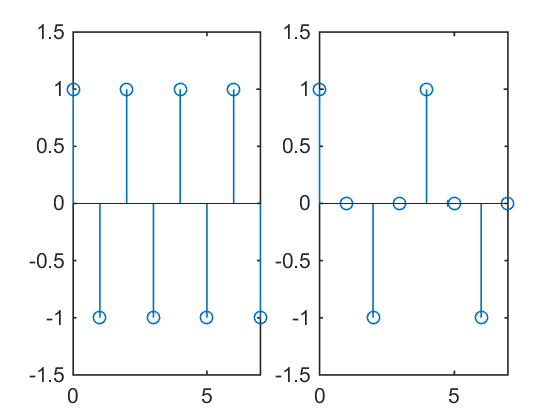

In [15]:
n = 0:7;
x1 = cos(pi*n);
x2 = cos(3/2*pi*n);

subplot(1,2,1), stem(n,x1), axis([0,7,-1.5 1.5])
subplot(1,2,2), stem(n,x2), axis([0,7,-1.5 1.5])

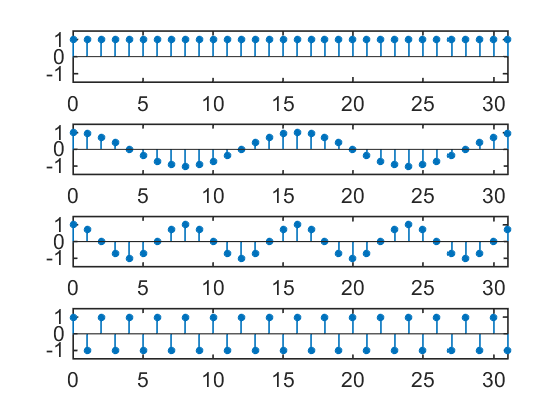

In [16]:
n = 0:31;
x1 = cos(0*pi*n);
x2 = cos(1/8*pi*n);
x3 = cos(1/4*pi*n);
x4 = cos(1*pi*n);

subplot(4,1,1), stem(n,x1,'filled','markersize',3), axis([0,31,-1.5 1.5])
subplot(4,1,2), stem(n,x2,'filled','markersize',3), axis([0,31,-1.5 1.5])
subplot(4,1,3), stem(n,x3,'filled','markersize',3), axis([0,31,-1.5 1.5])
subplot(4,1,4), stem(n,x4,'filled','markersize',3), axis([0,31,-1.5 1.5])

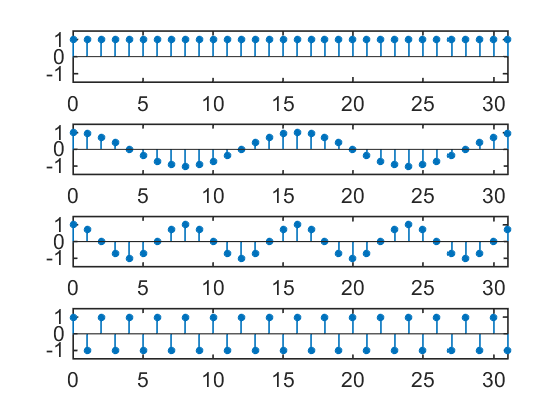

In [17]:
n = 0:31;
x5 = cos(2*pi*n);
x6 = cos(15/8*pi*n);
x7 = cos(7/4*pi*n);
x8 = cos(1*pi*n);

subplot(4,1,1), stem(n,x5,'filled','markersize',3), axis([0,31,-1.5 1.5])
subplot(4,1,2), stem(n,x6,'filled','markersize',3), axis([0,31,-1.5 1.5])
subplot(4,1,3), stem(n,x7,'filled','markersize',3), axis([0,31,-1.5 1.5])
subplot(4,1,4), stem(n,x8,'filled','markersize',3), axis([0,31,-1.5 1.5])

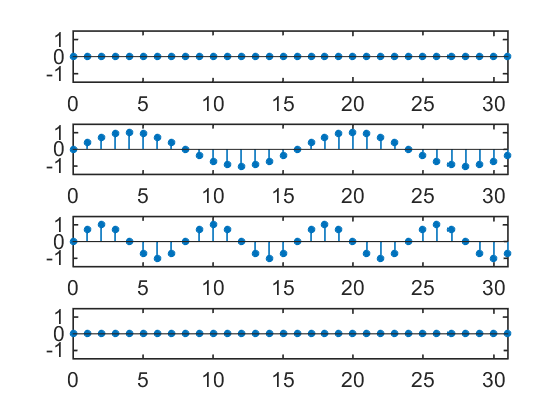

In [18]:
n = 0:31;
x1 = sin(0*pi*n);
x2 = sin(1/8*pi*n);
x3 = sin(1/4*pi*n);
x4 = sin(1*pi*n);

subplot(4,1,1), stem(n,x1,'filled','markersize',3), axis([0,31,-1.5 1.5])
subplot(4,1,2), stem(n,x2,'filled','markersize',3), axis([0,31,-1.5 1.5])
subplot(4,1,3), stem(n,x3,'filled','markersize',3), axis([0,31,-1.5 1.5])
subplot(4,1,4), stem(n,x4,'filled','markersize',3), axis([0,31,-1.5 1.5])

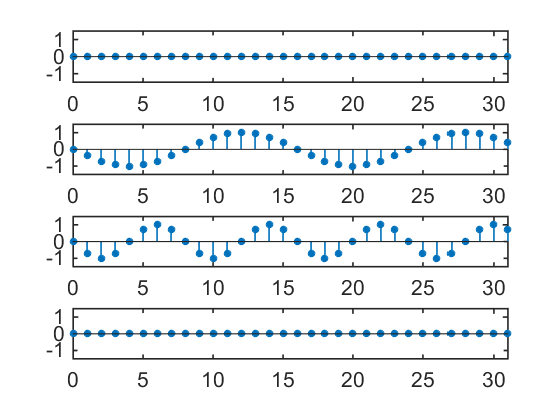

In [19]:
n = 0:31;
x5 = sin(2*pi*n);
x6 = sin(15/8*pi*n);
x7 = sin(7/4*pi*n);
x8 = sin(1*pi*n);

subplot(4,1,1), stem(n,x5,'filled','markersize',3), axis([0,31,-1.5 1.5])
subplot(4,1,2), stem(n,x6,'filled','markersize',3), axis([0,31,-1.5 1.5])
subplot(4,1,3), stem(n,x7,'filled','markersize',3), axis([0,31,-1.5 1.5])
subplot(4,1,4), stem(n,x8,'filled','markersize',3), axis([0,31,-1.5 1.5])

__Aliasing__

In descrete signal, there is identical signals with different frequency.

$$x_1[n] = e^{j((\omega+2\pi)n+\phi)} = e^{j(\omega n+\phi)+j2\pi n} = e^{j(\omega n+\phi)}e^{j2\pi n} = e^{j(\omega n+\phi)} = x_2[n]$$

Any integer multiple of $\,2\pi$ will do
$$x_3[n] = e^{j((\omega+2\pi m)n+\phi)}, \, m \in \mathbb{Z}$$

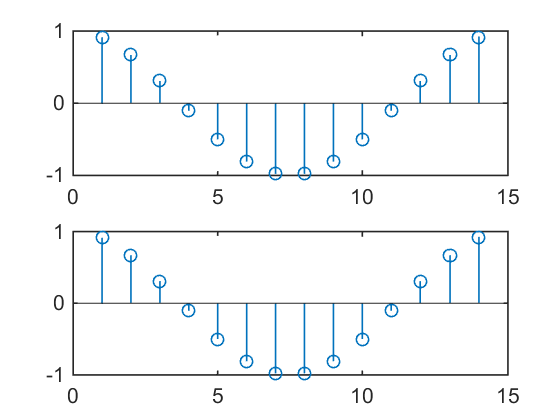

In [20]:
N = 15;
k = 1;
n = 1:N-1;

for i = 1:N-1
    xn(i) = cos(2*pi*k*i/N);
    xn2(i) = cos((2*pi*k/N + 2*pi)*i);
end

subplot(2,1,1), stem(n,xn)
subplot(2,1,2), stem(n,xn2)

__Aliasing example__

- Media Signal Processing MAT 201A
- at Media Arts and Technology, University of California, Santa Barbara
- by Andres Cabrera
- from http://nbviewer.ipython.org/github/mantaraya36/201A-ipython/blob/master/Sampling%20and%20Quantization.ipynb?create=1

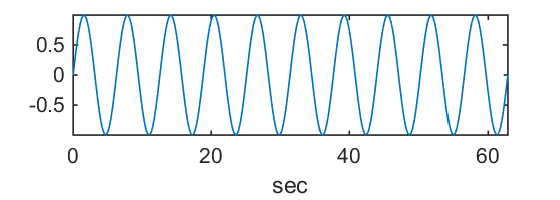

In [21]:
%plot -s 560,200

t = linspace(0,10*2*pi,300);
x = sin(t);
plot(t,x), axis tight, xlabel('sec')

Anything less than 20 points will cause problems:

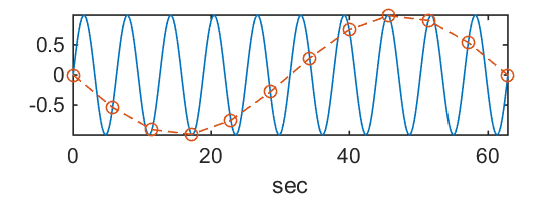

In [22]:
%plot -s 560,200

t = linspace(0,10*2*pi,300);
x = sin(t);
ts = linspace(0,10*2*pi,12);
xs = sin(ts);

plot(t,x,ts,xs,'o--'), axis tight, xlabel('sec')

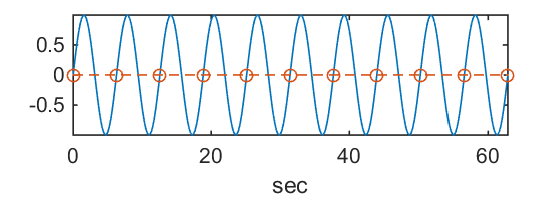

In [23]:
%plot -s 560,200

t = linspace(0,10*2*pi,300);
x = sin(t);
ts = linspace(0,10*2*pi,11);
xs = sin(ts);

plot(t,x,ts,xs,'o--'), axis tight, xlabel('sec')

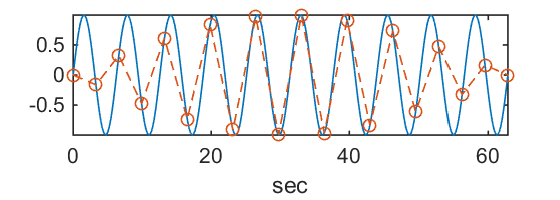

In [24]:
%plot -s 560,200

t = linspace(0,10*2*pi,300);
x = sin(t);
ts = linspace(0,10*2*pi,20);
xs = sin(ts);

plot(t,x,ts,xs,'o--'), axis tight, xlabel('sec')

# 4. Signal Visualization

## 4.1. Visualize the Harmonic Sinusoidals
- by Richard Baraniuk at Rice University
- https://www.youtube.com/watch?v=wK4M1h1y7Hk&list=PLBD_gON7g_m1JMmglYLzxFZoDuzcabq-0&index=8

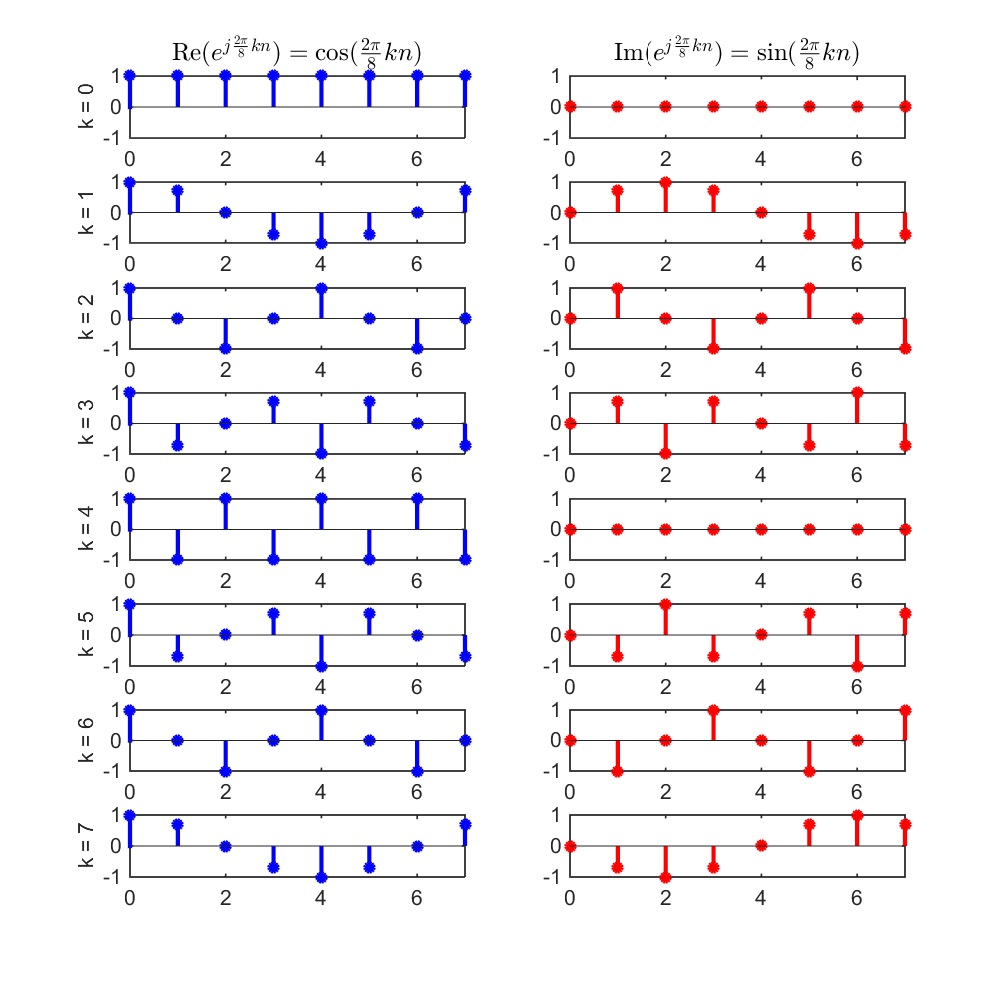

In [25]:
%plot -s 1000,1000

% create two signals that we'll use to communicate

N = 8;
n = 0:N-1;

for k = 0:N-1;
    x = exp(1j*(2*pi/N)*k*n);
    
    subplot(8,2,2*k+1)
    stem(n,real(x),'b','fill','LineWidth',2,'Markersize',4); 
    
    ylabel(['k = ',num2str(k)],'fontsize',10);
    axis([0, 7, -1, 1]);
    
    subplot(8,2,2*k+2)
    stem(n,imag(x),'r','fill','LineWidth',2,'Markersize',4); 
    axis([0, 7, -1, 1]);
end

subplot(821)
title(['${\rm Re}(e^{j \frac{2\pi}{8}kn}) = \cos(\frac{2\' ...
       'pi}{8}kn)$'],'interpreter','LaTeX','fontsize',12);

subplot(822)
title(['${\rm Im}(e^{j \frac{2\pi}{8}kn}) = \sin(\frac{2\' ...
       'pi}{8}kn)$'],'interpreter','LaTeX','fontsize',12);

## 4.2. Visual Matrix of Harmonic Sinusoids
- https://www.youtube.com/watch?v=wK4M1h1y7Hk&list=PLBD_gON7g_m1JMmglYLzxFZoDuzcabq-0&index=8

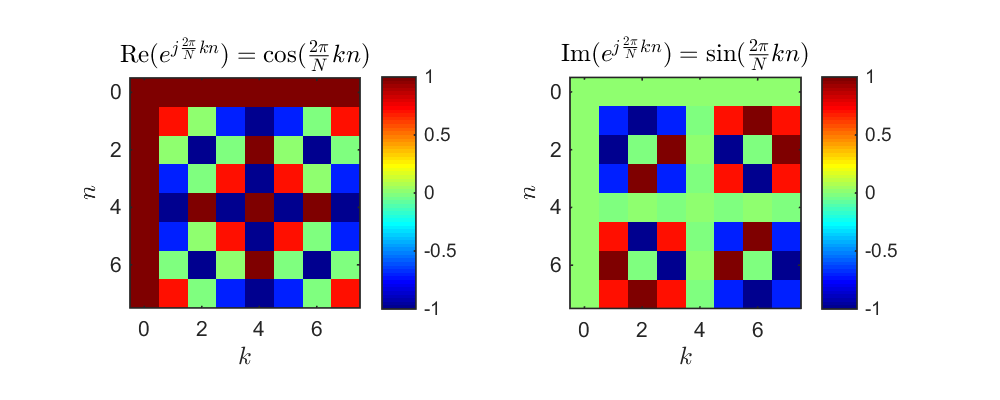

In [26]:
%plot -s 1000,400

%% Visual Matrix of Harmonic Sinusoids %%  
N = 8;
n = 0:N-1;
for k = 0:N-1
    D(:,k+1) = exp(1j*(2*pi/N)*k*n)';
end

subplot(121), imagesc(n,n,real(D)), colormap('jet'), axis square
xlabel('$k$','interpreter','LaTeX','fontsize',12);
ylabel('$n$','interpreter','LaTeX','fontsize',12);
title('${\rm Re}(e^{j\frac{2\pi}{N}kn})=\cos(\frac{2\pi}{N}kn)$',...
'interpreter','LaTeX','fontsize',12);
colorbar

subplot(122), imagesc(n,n,imag(D)), colormap('jet'), axis square
xlabel('$k$','interpreter','LaTeX','fontsize',12);
ylabel('$n$','interpreter','LaTeX','fontsize',12);
title('${\rm Im}(e^{j\frac{2\pi}{N}kn})=\sin(\frac{2\pi}{N}kn)$',...
'interpreter','LaTeX','fontsize',12);
colorbar

## 4.3. Visualizing Complex Exponentials $z^n$
- from https://www.youtube.com/watch?v=tMSfLzWWHzg&list=PLBD_gON7g_m1JMmglYLzxFZoDuzcabq-0&index=9

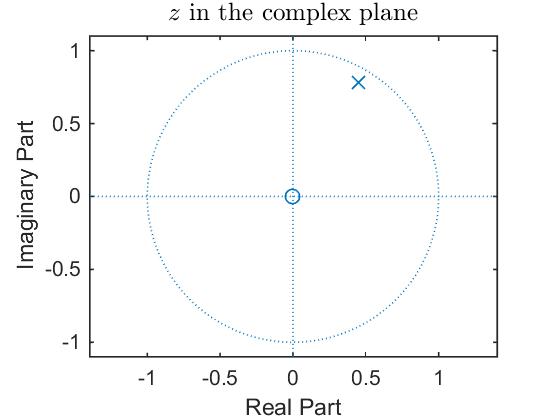

In [27]:
%plot -s 560,420

% Visualizing Complex Exponentials z^n 

% input value of z
z = 0.9 * exp(1j*pi/3);
%z = 0.9 + j * 0

% plot z in complex plane
zplane(0,z);
title(['$z~{\rm in~the~complex~plane}$'],'interpreter','LaTeX','fontsize',12);

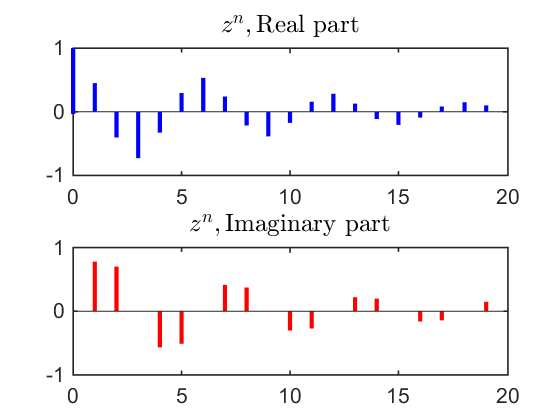

In [28]:
% plot real and imaginary parts of z^n
N = 20;
n = 0:N-1;
x = z.^n;

subplot(211), stem(n,real(x),'b','Marker','none','LineWidth',2)
title(['$z^n, {\rm Real~part}$'],'interpreter','LaTeX','fontsize',12);
subplot(212), stem(n,imag(x),'r','Marker','none','LineWidth',2)
title(['$z^n, {\rm Imaginary~part}$'],'interpreter','LaTeX','fontsize',12);

# 5. Signal Synthesis

- Digital Signal Processing using MATLAB
- By Vinay K. Ingle, John G. Proakis
- from http://www.ece.iit.edu/~biitcomm/Yarmouk/Digital%20Signal%20Processing%20Using%20Matlab%20v4.0%20(John%20G%20Proakis).pdf

### Delta function: $\delta[n]$

$$x[n]=\delta[n-n_0]  \quad n_1 \leq n \leq n_2$$

```impseq(n0,n1,n2)```: 

``` octave
function [x,n] = impseq(n0,n1,n2)

% Generates x(n) = delta(n-n0); n1 <= n,n0 <= n2
% [x,n] = impseq(n0,n1,n2)

if ((n0 < n1) | (n0 > n2) | (n1 > n2))
	error('arguments must satisfy n1 <= n0 <= n2')
end

n = [n1:n2];
% x = [zeros(1,(n0-n1)), 1, zeros(1,(n2-n0))];
x = [(n-n0) == 0];
```

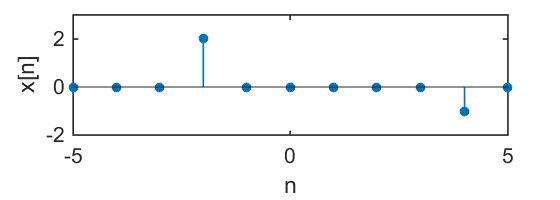

In [29]:
%plot -s 560,200

% delta function

n = [-5:5];
x = 2*impseq(-2,-5,5)-impseq(4,-5,5);

figure(1); clf
stem(n,x,'filled','markersize',4); 
xlabel('n'); ylabel('x[n]'); 
axis([-5,5,-2,3])

### step function: $u[n]$

$$x[n]=u[n-n_0]  \quad n_1 \leq n \leq n_2$$

```stepseq(n0,n1,n2)```: 

```octave
function [x,n] = stepseq(n0,n1,n2)
% Generates x(n) = u(n-n0); n1 <= n,n0 <= n2
% [x,n] = stepseq(n0,n1,n2)

if ((n0 < n1) | (n0 > n2) | (n1 > n2))
	error('arguments must satisfy n1 <= n0 <= n2')
end

n = [n1:n2];
% x = [zeros(1,(n0-n1)), ones(1,(n2-n0+1))];
x = [(n-n0) >= 0];
```

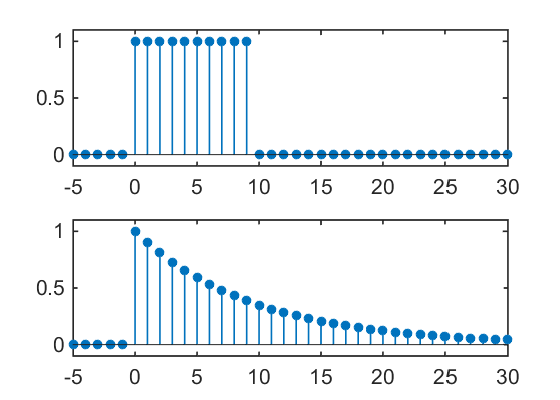

In [30]:
%plot -s 560,400

% step function

n = -5:30;
x = stepseq(0,-5,30) - stepseq(10,-5,30);

h = 0.9.^n.*stepseq(0,-5,30);

subplot(2,1,1), stem(n,x,'filled','markersize',4), axis tight, ylim([-0.1, 1.1]) 
subplot(2,1,2), stem(n,h,'filled','markersize',4), axis tight, ylim([-0.1, 1.1])

## 5.1. Signal Synthesis

\begin{align}
x[n]=\{1,2,&\;3,4,5,6,7,6,5,4,3,2,1\}\\
&\uparrow
\end{align}

$$x_1[n]=2x[n-5]-3x[n+4]$$

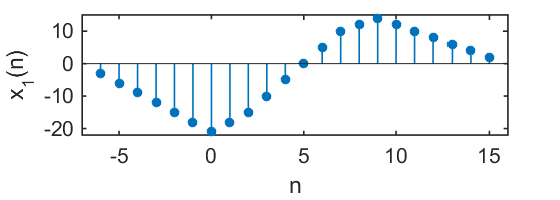

In [31]:
%plot -s 560,200
%% example 1

n = -2:10; 
x = [1:7,6:-1:1];

[x11,n11] = sigshift(x,n,5); 
[x12,n12] = sigshift(x,n,-4);
[x1,n1] = sigadd(2*x11,n11,-3*x12,n12);

figure(1),  clf
stem(n1,x1,'filled','markersize',4); 
xlabel('n');    ylabel('x_1(n)'); 
axis([min(n1)-1,max(n1)+1,min(x1)-1,max(x1)+1])

\begin{align}
x[n]=\{1,2,&\;3,4,5,6,7,6,5,4,3,2,1\}\\
&\uparrow
\end{align}

$$x_2[n]=x[3-n]+x[n]x[n-2]$$

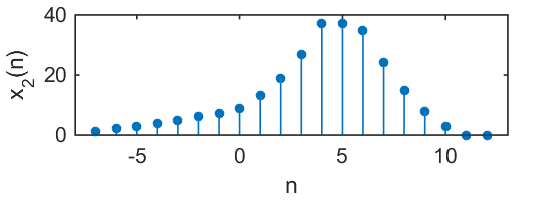

In [32]:
%plot -s 560,200
%% example 2

[x21,n21] = sigfold(x,n); 
[x21,n21] = sigshift(x21,n21,3);

[x22,n22] = sigshift(x,n,2); 
[x22,n22] = sigmult(x,n,x22,n22);

[x2,n2] = sigadd(x21,n21,x22,n22);

figure(2),  clf
stem(n2,x2,'filled','markersize',4); 
xlabel('n');    ylabel('x_2(n)'); 
axis([min(n2)-1,max(n2)+1,0,40])

$$x_3[n] = x[(n-6)_{15}]$$

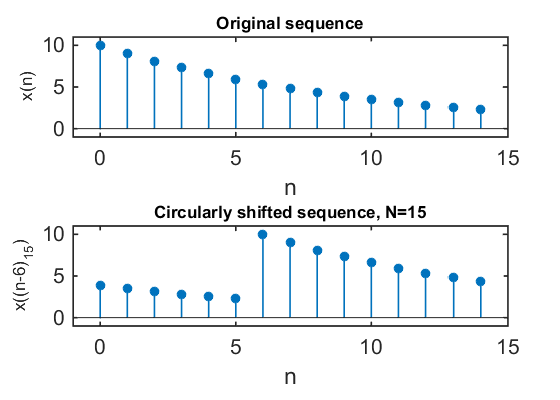

In [33]:
%plot -s 560,400
%% x((n-6))_15

n = 0:14; 
x = 10*(0.9).^n;

x3 = cirshftt(x,6,15); 

subplot(2,1,1); stem(n,x,'filled','markersize',4); 
title('Original sequence','fontsize',8), xlabel('n'), ylabel('x(n)','fontsize',8) 
axis([-1,15,-1,11])

subplot(2,1,2); stem(n,x3,'filled','markersize',4); 
title('Circularly shifted sequence, N=15','fontsize',8), 
xlabel('n'), ylabel('x((n-6)_{15})','fontsize',8), axis([-1,15,-1,11])

```octave
function [y,n] = sigshift(x,m,n0)
% implements y(n) = x(n-n0)
% [y,n] = sigshift(x,m,n0)

n = m + n0;
y = x;
```

```octave
function [y,n] = sigfold(x,n)

% implements y(n) = x(-n)
% [y,n] = sigfold(x,n)

y = fliplr(x); 
n = -fliplr(n);
```

```octave
function [y,n] = sigadd(x1,n1,x2,n2)

% implements y(n) = x1(n)+x2(n)
% [y,n] = sigadd(x1,n1,x2,n2)
%   y = sum sequence over n, which includes n1 and n2
%  x1 = first sequence over n1
%  x2 = second sequence over n2 (n2 can be different from n1)

n = min(min(n1),min(n2)):max(max(n1),max(n2));           % duration of y(n)

y1 = zeros(1,length(n)); y2 = y1;                        % initialization
y1(find((n >= min(n1)) & (n <= max(n1)) == 1)) = x1;     % x1 with duration of y
y2(find((n >= min(n2)) & (n <= max(n2)) == 1)) = x2;     % x2 with duration of y
y = y1 + y2;                                             % sequence addition
```

```octave
function y = cirshftt(x,m,N)
% Circular shift of m samples wrt size N in sequence x: (time domain)
% [y] = cirshftt(x,m,N)
% y = output sequence containing the circular shift
% x = input sequence of length <= N
% m = sample shift
% N = size of circular buffer
%  Method: y(n) = x((n-m) mod N)

% Check for length of x
if length(x) > N
        error('N must be >= the length of x')
end

x = [x zeros(1,N-length(x))];
n = [0:1:N-1];
n = mod(n-m,N);
y = x(n+1);                                         
```

```octave
function [y,n] = sigmult(x1,n1,x2,n2)
% implements y(n) = x1(n)*x2(n)
% [y,n] = sigmult(x1,n1,x2,n2)
%   y = product sequence over n, which includes n1 and n2
%  x1 = first sequence over n1
%  x2 = second sequence over n2 (n2 can be different from n1)

n = min(min(n1),min(n2)):max(max(n1),max(n2));           % duration of y(n)

y1 = zeros(1,length(n)); y2 = y1;               
y1(find(( n>= min(n1)) & (n <= max(n1)) == 1)) = x1;     % x1 with duration of y
y2(find(( n>= min(n2)) & (n <= max(n2)) == 1)) = x2;     % x2 with duration of y
y = y1 .* y2;                                            % sequence multiplication
```

## 5.2. Think of $x[k-n]$

Given 

\begin{align*}
x[n]=\{&\;0,1,2,3,0,0,0\}\\
&\uparrow
\end{align*}


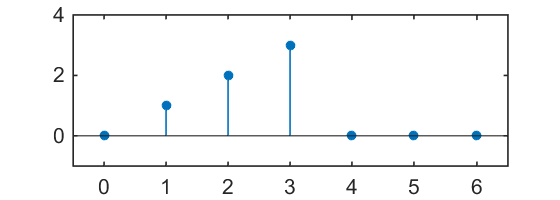

In [34]:
%plot -s 560,200

x = [0 1 2 3 0 0 0];
N = length(x);
n = 0:N-1;

stem(n,x,'filled','markersize',4), axis([-0.5 N-0.5 -1 4])

$$x_1[n] = x[-n]$$

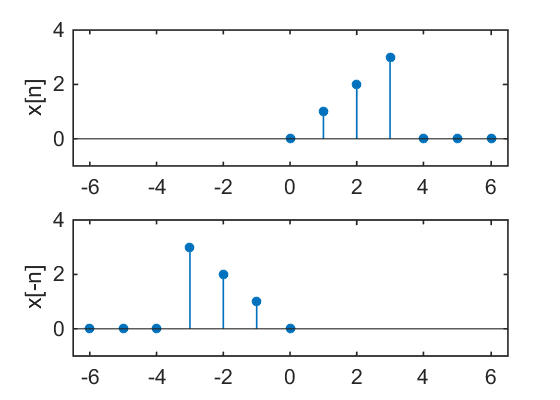

In [35]:
%plot -s 560,400
[x1,n1] = sigfold(x,n);

subplot(2,1,1), stem(n,x,'filled','markersize',4)
ylabel('x[n]'), axis([-6.5 6.5 -1 4])
subplot(2,1,2), stem(n1,x1,'filled','markersize',4)
ylabel('x[-n]'), axis([-6.5 6.5 -1 4])

$$x_2[n] = x[n-2]$$

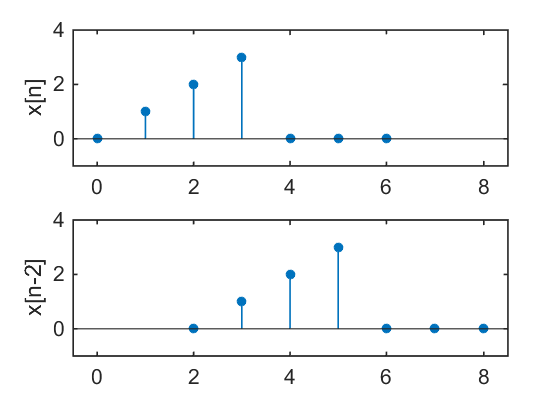

In [36]:
%plot -s 560,400
[x2,n2] = sigshift(x,n,2);

subplot(2,1,1), stem(n,x,'filled','markersize',4)
ylabel('x[n]'), axis([-0.5 8.5 -1 4])
subplot(2,1,2), stem(n2,x2,'filled','markersize',4)
ylabel('x[n-2]'), axis([-0.5 8.5 -1 4])

$$x_3[n] = x[-n+2] ~?$$

$$x_4[n] = x[-n+2] ~?$$

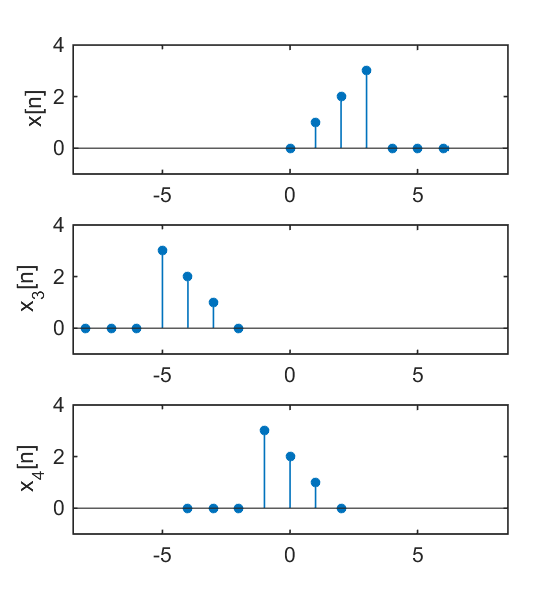

In [37]:
%plot -s 560,600

[x2,n2] = sigshift(x,n,2);
[x3,n3] = sigfold(x2,n2);
[x1,n1] = sigfold(x,n);
[x4,n4] = sigshift(x1,n1,2);

subplot(3,1,1), stem(n,x,'filled','markersize',4)
ylabel('x[n]'), axis([-8.5 8.5 -1 4])
subplot(3,1,2), stem(n3,x3,'filled','markersize',4)
ylabel('x_3[n]'), axis([-8.5 8.5 -1 4])
subplot(3,1,3), stem(n4,x4,'filled','markersize',4)
ylabel('x_4[n]'), axis([-8.5 8.5 -1 4])

# 6. Signals are vector

**Linear Combination in Sound** 

- by Richard Baraniuk at Rice University
- from https://www.youtube.com/watch?v=0TP97T2spDc&index=10&list=PLBD_gON7g_m2jozqQSteL73MTAhLIllQ6

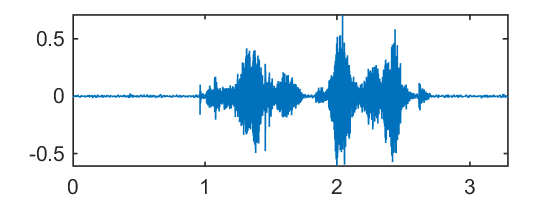

In [38]:
%plot -s 560,200

%% LINEAR COMBINATION IN SOUND
fs = 44100;     % sampling frequency
N = 145000;     % # of data points
M = 4;

% signal 0: "Alas, Poor Yorick!"
load([pwd,'\image_files\hamlet.mat'])
hamlet = 2*alas(1:N);
sound(hamlet,fs);
plot((0:N-1)/fs,hamlet), axis tight

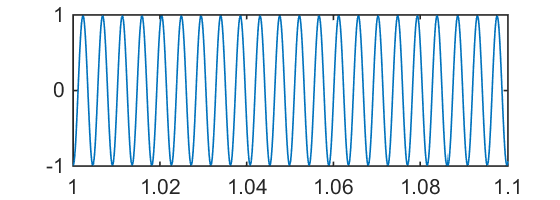

In [39]:
%plot -s 560,200

% sine wave
n = 0:N-1;
sinewave = 0.99*cos(2*pi/200 * n)';
plot((0:N-1)/fs,sinewave), xlim([1,1.1])
sound(sinewave,fs);

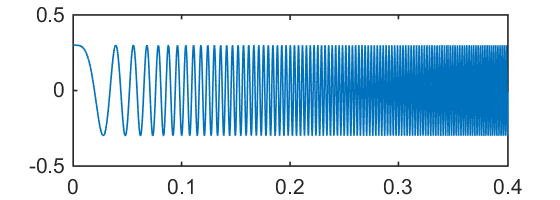

In [40]:
%plot -s 560,200

% chirp (https://en.wikipedia.org/wiki/Chirp)
chirp = 0.3*cos(2*pi/3000000 * n.^2)';
plot((0:N-1)/fs,chirp), xlim([0,0.4])
sound(chirp,fs)

In [41]:
% white gaussian noise
noise = 0.1*randn(N,1);
sound(noise,fs);

In [42]:
% build "X" matrix
X = [hamlet, sinewave, chirp, noise];

In [43]:
% specify an "a" vector, multiply by "X", and listen to the result "y"
a = [1 0 0 0]';

y = X*a;
sound(y,fs);

In [44]:
% specify an "a" vector, multiply by "X", and listen to the result "y"
a = [0 1 0 0]';
y = X*a;
sound(y,fs);

In [45]:
% specify an "a" vector, multiply by "X", and listen to the result "y"
a = [0 0 1 0]';
y = X*a;
sound(y,fs);

In [46]:
% specify an "a" vector, multiply by "X", and listen to the result "y"
a = [0 0 0 1]';
y = X*a;
sound(y,fs);

In [47]:
% specify an "a" vector, multiply by "X", and listen to the result "y"
a = [0.5 0.5 0.25 0.1]';
y = X*a;
sound(y,fs);

In [48]:
% specify an "a" vector, multiply by "X", and listen to the result "y"
a = [0.25 0.5 0.5 0.1]';
y = X*a;
sound(y,fs);

## 6.1. Strength of a Vector

How to quantify the strength of a vector?

How to say that one signal is "stronger" than another?

__2-Norm__

The Euclidean length, or 2-norm, of a vector $x \in \mathbb{C}^N$ is given by

$$ \lVert x \rVert_2 = \sqrt{\sum_{n = 0}^{N} \lvert x[n] \rvert^2} $$

The energy of $x$ is given by $\lVert x \rVert_2^2$

__p-Norm__

The $p$-norm of a vector $x \in \mathbb{C}^N$ is given by

$$\lVert x \rVert_p = \left( \sum \limits_{n=0}^{N-1}{\lvert x[n] \rvert }\right)^{1/p}$$

__$\infty$-Norm__

The $\infty$-norm of a vector $x \in \mathbb{C} ^N$ is given by

$$\lVert x \rVert_\infty = \max \, \lvert \, x[n] \, \rvert$$

$\lVert x \rVert_\infty$ measures the __peak value__ (of the magnitude)



In [49]:
N = 8;
n = 0:N-1;

k = 1;
x = exp(1j*2*pi/N).^(n'*k) % d_k[n], k = 1 and N = 10

x =

   1.0000 + 0.0000i
   0.7071 + 0.7071i
   0.0000 + 1.0000i
  -0.7071 + 0.7071i
  -1.0000 + 0.0000i
  -0.7071 - 0.7071i
  -0.0000 - 1.0000i
   0.7071 - 0.7071i

In [50]:
% multiple ways to compute norm of signal (vector)

sum(x.*conj(x))
sum(x.*conj(x))/sqrt(N)

sum(abs(x).^2)
sum(abs(x).^2)/sqrt(N)

norm(x,1)
norm(x,2)
norm(x,inf)

ans =

     8


ans =

    2.8284


ans =

     8


ans =

    2.8284


ans =

     8


ans =

    2.8284


ans =

     1

**transpose**

In [51]:
x = [1 + 3j, 2 + 2j]

x =

   1.0000 + 3.0000i   2.0000 + 2.0000i

In [52]:
% Hermitian transpose (= complex conjugate transpose)
x' 

ans =

   1.0000 - 3.0000i
   2.0000 - 2.0000i

In [53]:
% transpose
x.'

ans =

   1.0000 + 3.0000i
   2.0000 + 2.0000i

## 6.2. Inner Product

$$
\langle x,y \rangle = y^H x = \sum \limits_{n=0}^{N-1} x[n]\, y[n]^*$$

<img src = "./image_files/Inner_Product.png" style="border:1px solid black" width = 700>

- Inner product of a signal with itself

$$\langle x,x \rangle = \sum \limits_{n=0}^{N-1} x[n]\, x[n]^* = \sum \limits_{n=0}^{N-1}{\lvert x[n] \rvert}^2 = \lVert x \rVert_2^2$$

- Two vectors $x,y \in \mathbb{C}^N$ are __orthogonal__ if 

$$\langle x,y \rangle = 0$$

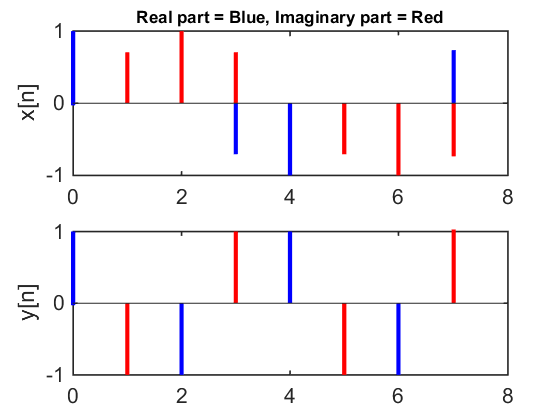

innerproduct =

   8.8164e-16 - 2.2204e-15i

In [54]:
%plot -s 560,420

% INNER PRODUCT OF SINUSOIDS
N = 8;
n = 0:N-1;

k = 1;
x = exp(1j*2*pi/N).^(n'*k);

k = 6;
y = exp(1j*2*pi/N).^(n'*k);

subplot(211)
stem(n,real(x),'b','Marker','none','LineWidth',2); hold on, ylabel('x[n]')
stem(n,imag(x),'r','Marker','none','LineWidth',2); hold off
title('Real part = Blue, Imaginary part = Red','fontsize',8)

subplot(212)
stem(n,real(y),'b','Marker','none','LineWidth',2); hold on, ylabel('y[n]')
stem(n,imag(y),'r','Marker','none','LineWidth',2); hold off

% Note: in Matlab, the operation ' performs complex conjugate transpose
innerproduct = y' * x 


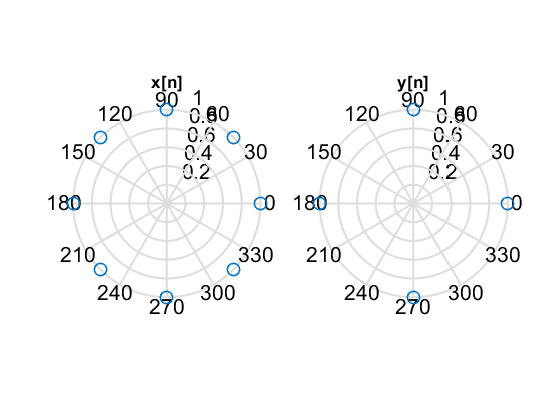

In [55]:
%plot -s 560,420

subplot(121),  polar(angle(x),abs(x),'o'), title('x[n]','fontsize',8)
subplot(122),  polar(angle(y),abs(y),'o'), title('y[n]','fontsize',8)

**Inner Product Application to Digital Communication**

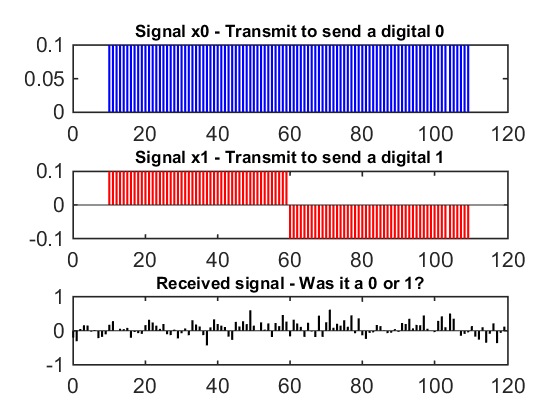

In [56]:
%plot -s 560,420
%%
N = 120;
n = 0:N-1;
x0 = [zeros(10,1); ones(100,1); zeros(10,1)];
x0 = x0/norm(x0);
x1 = [zeros(10,1); ones(50,1); -ones(50,1); zeros(10,1)];
x1 = x1/norm(x1);
signals = [x0,x1];

subplot(311)
stem(n,x0,'b','Marker','none','LineWidth',1)
title('Signal x0 - Transmit to send a digital 0','fontsize',8)
subplot(312)
stem(n,x1,'r','Marker','none','LineWidth',1)
title('Signal x1 - Transmit to send a digital 1','fontsize',8)

% received signal is either x0 or x1 with additive noise
y = signals(:,round(rand(1,1))+1) + 0.2*randn(size(x1));

subplot(313)
stem(n,y,'k','Marker','none','LineWidth',1)
title('Received signal - Was it a 0 or 1?','fontsize',8)


In [57]:
% computes the inner products between y and both x0 and x1:
innerproduct0 = abs( y' * x0 )
innerproduct1 = abs( y' * x1 )

RECEIVEDBIT = (innerproduct1 > innerproduct0)

innerproduct0 =

    1.0274


innerproduct1 =

    0.1522


RECEIVEDBIT =

     0

## 6.3. Harmonic Sinusoids are Orthogonal

<img src = "./image_files/orthogonal.png" style="border:1px solid black" width = 700>

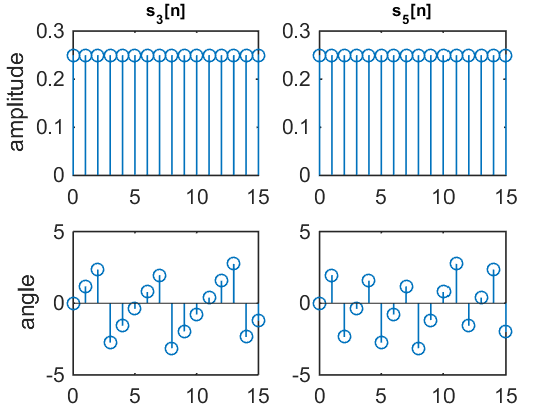

ans =

   8.3267e-17 - 5.5511e-17i


ans =

     1


ans =

    1.0000

In [58]:
% to check two complex signals are orthogonal

N = 16;
n = 0:N-1;

k = 3;
s_3 = 1/sqrt(N)*exp(1j*2*pi/N).^(n'*k);

k = 5;
s_5 = 1/sqrt(N)*exp(1j*2*pi/N).^(n'*k);

% ': complex conjugate transpose
s_3'*s_5    % to see they are orthogonal
s_3'*s_3    % to see it is normalized
s_5'*s_5    % to see it is normalized

% plot
subplot(2,2,1),  stem(n,abs(s_3)),  xlim([0,15]), title('s_3[n]','fontsize',8), ylabel('amplitude')
subplot(2,2,2),  stem(n,abs(s_5)),  xlim([0,15]), title('s_5[n]','fontsize',8)

subplot(2,2,3),  stem(n,angle(s_3)), xlim([0,15]), ylabel('angle')
subplot(2,2,4),  stem(n,angle(s_5)), xlim([0,15])


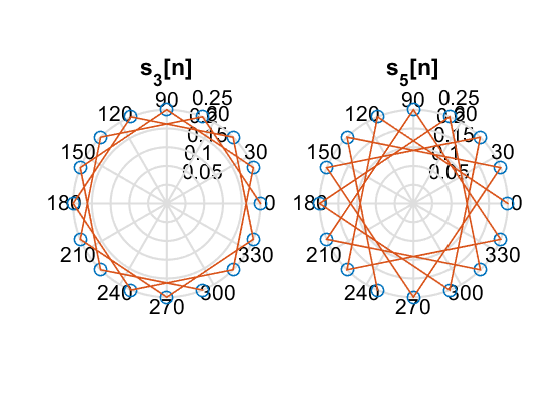

In [59]:
%% polar
% angle(H) returns the phase angles, in radians
figure
subplot(1,2,1),  polar(angle(s_3),abs(s_3),'o'), hold on
polar(angle(s_3),abs(s_3)),  title('s_3[n]')

subplot(1,2,2),  polar(angle(s_5),abs(s_5),'o'), hold on
polar(angle(s_5),abs(s_5)),  title('s_5[n]')

In [60]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>